Strateji1

In [15]:
import yfinance as yf
import numpy as np

symbols = ['AAPL', 'MSFT', 'GOOGL',  'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
print("Year\tInitial Investment \tYillik getiri (%)\t Std Dev (%)\tAvg Max Drawdown (%)\tSharpe Ratio")
for year in years:
    annual_returns = []
    max_drawdowns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100
            annual_returns.append(annual_return)

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

    avg_annual_return = np.mean(annual_returns)
    std_dev_annual_return = np.std(annual_returns)
    avg_max_drawdown = np.mean(max_drawdowns)
    
    excess_returns = np.array(annual_returns) - risk_free_rate / 252
    sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)

    print(f"{year}\t${initial_investment:.2f}\t\t\t{np.mean(returns):.2f}\t\t\t{annual_std_dev:.2f}\t\t\t{avg_max_drawdown:.2f}\t\t\t{sharpe_ratio:.2f}")



Year	Initial Investment 	Yillik getiri (%)	 Std Dev (%)	Avg Max Drawdown (%)	Sharpe Ratio


DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000


2015	$1000.00			22.82			21.09			-18.84			6.49


DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400


2016	$1000.00			22.82			21.09			-15.06			15.35


DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400


2017	$1000.00			22.82			21.09			-10.63			19.57


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400


2018	$1000.00			22.82			21.09			-22.44			1.24
2019	$1000.00			22.82			21.09			-15.45			25.15
2020	$1000.00			22.82			21.09			-37.38			6.58
2021	$1000.00			22.82			21.09			-16.40			17.17


Strateji 2

In [17]:
import yfinance as yf
import numpy as np

symbols = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

print("Year\tInitial Investment \tYillik getiri (%)\t Std Dev (%)\tAvg Max Drawdown (%)\tSharpe Ratio")
for year in years:
    annual_returns = []
    max_drawdowns = []

    best_stock = None
    best_return = -999999  # Başlangıçta en düşük olası değer

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year-1}-01-01', end=f'{year-1}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100

            if annual_return > best_return:
                best_return = annual_return
                best_stock = symbol

    if best_stock:
        stock = yf.Ticker(best_stock)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100

            annual_returns.append(annual_return)

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

            avg_annual_return = np.mean(annual_returns)
            std_dev_annual_return = np.std(annual_returns)
            avg_max_drawdown = np.mean(max_drawdowns)

            excess_returns = np.array(annual_returns) - risk_free_rate / 252
            if np.std(excess_returns) != 0:
                sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)
            else:
                sharpe_ratio = 0 

            print(f"{year}\t\t${initial_investment:.2f}\t\t\t{avg_annual_return:.2f}\t\t\t\t{std_dev_annual_return:.2f}\t\t\t\t{avg_max_drawdown:.2f}\t\t\t\t{sharpe_ratio:.2f}")


Year	Initial Investment 	Yillik getiri (%)	 Std Dev (%)	Avg Max Drawdown (%)	Sharpe Ratio


DOW: Data doesn't exist for startDate = 1388552400, endDate = 1420002000


2015		$1000.00			-0.87				0.00				-28.31				0.00


DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000


2016		$1000.00			4.35				0.00				-13.53				0.00


DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400


2017		$1000.00			72.71				0.00				-7.71				0.00


DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400


2018		$1000.00			8.67				0.00				-24.67				0.00


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400


2019		$1000.00			23.71				0.00				-12.14				0.00
2020		$1000.00			79.62				0.00				-31.43				0.00
2021		$1000.00			38.55				0.00				-18.60				0.00


Strateji 3

In [19]:
import yfinance as yf
import numpy as np

symbols = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

print("Year\tInitial Investment \tYillik getiri (%)\t Std Dev (%)\tAvg Max Drawdown (%)\tSharpe Ratio")
for year in years:
    annual_returns = []
    max_drawdowns = []

    worst_stock = None
    worst_return = float('inf')  # Başlangıçta en yüksek olası değer

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year-1}-01-01', end=f'{year-1}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100

            if annual_return < worst_return:
                worst_return = annual_return
                worst_stock = symbol

    if worst_stock:
        stock = yf.Ticker(worst_stock)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100

            annual_returns.append(annual_return)

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

            avg_annual_return = np.mean(annual_returns)
            std_dev_annual_return = np.std(annual_returns)
            avg_max_drawdown = np.mean(max_drawdowns)

            excess_returns = np.array(annual_returns) - risk_free_rate / 252
            if np.std(excess_returns) != 0:
                sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)
            else:
                sharpe_ratio = 0 

            print(f"{year}\t\t${initial_investment:.2f}\t\t\t{avg_annual_return:.2f}\t\t\t\t{std_dev_annual_return:.2f}\t\t\t\t{avg_max_drawdown:.2f}\t\t\t\t{sharpe_ratio:.2f}")


Year	Initial Investment 	Yillik getiri (%)	 Std Dev (%)	Avg Max Drawdown (%)	Sharpe Ratio


DOW: Data doesn't exist for startDate = 1388552400, endDate = 1420002000


2015		$1000.00			-11.21				0.00				-22.96				0.00


DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000


2016		$1000.00			15.73				0.00				-9.30				0.00


DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400


2017		$1000.00			21.94				0.00				-15.19				0.00


DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400


2018		$1000.00			-7.03				0.00				-24.73				0.00


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400


2019		$1000.00			36.34				0.00				-11.97				0.00
2020		$1000.00			-30.47				0.00				-41.95				0.00
2021		$1000.00			-0.00				0.00				-30.09				0.00


Strateji 4

In [23]:
import yfinance as yf
import numpy as np

symbols = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
print("Year\tInitial Investment \tYillik getiri (%)\t Std Dev (%)\tAvg Max Drawdown (%)\tSharpe Ratio")
for year in years:
    annual_returns = []
    max_drawdowns = []

    # En iyi getiri sağlayan 3 hisseyi al
    top_stocks = []
    stock_returns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year-1}-01-01', end=f'{year-1}-12-31')

        if len(history) > 0:
            start_price = history['Close'][0]
            end_price = history['Close'][-1]
            annual_return = ((end_price / start_price) - 1) * 100
            stock_returns.append((symbol, annual_return))

    stock_returns.sort(key=lambda x: x[1], reverse=True)
    top_stocks = stock_returns[:3]  # İlk 3 en iyi getiri sağlayan hisseyi seç

    # Portföyün getirilerini hesapla
    portfolio_return = 0
    for symbol, _ in top_stocks:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100
            portfolio_return += annual_return / 3  # Eşit ağırlıklı portföy olduğu için paylaştır

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

    avg_annual_return = np.mean(annual_returns)
    std_dev_annual_return = np.std(annual_returns)
    avg_max_drawdown = np.mean(max_drawdowns)
    
    excess_returns = np.array(annual_returns) - risk_free_rate / 252
    if np.std(excess_returns) != 0:
        sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)
    else:
        sharpe_ratio = 0 

    print(f"{year}\t${initial_investment:.2f}\t\t\t{portfolio_return:.2f}\t\t\t{std_dev_annual_return:.2f}\t\t\t{avg_max_drawdown:.2f}\t\t\t{sharpe_ratio:.2f}")


Year	Initial Investment 	Yillik getiri (%)	 Std Dev (%)	Avg Max Drawdown (%)	Sharpe Ratio


DOW: Data doesn't exist for startDate = 1388552400, endDate = 1420002000
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2015	$1000.00			1.05			nan			-24.97			nan


DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2016	$1000.00			-7.60			nan			-22.16			nan


DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2017	$1000.00			45.57			nan			-8.10			nan


DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2018	$1000.00			-5.83			nan			-31.43			nan


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2019	$1000.00			33.90			nan			-12.12			nan


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

2020	$1000.00			37.06			nan			-34.36			nan
2021	$1000.00			38.73			nan			-14.56			nan


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

Strateji 5

In [24]:
import yfinance as yf
import numpy as np

symbols = ['AAPL', 'MSFT', 'GOOGL',  'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
num_stocks = 3

print("Year\tInitial Investment \tAvg Annual Return (%)\t Std Dev (%)\tAvg Max Drawdown (%)\tSharpe Ratio\tWorst Stocks")
for year in years:
    annual_returns = []
    max_drawdowns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100
            annual_returns.append(annual_return)

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

    avg_annual_return = np.mean(annual_returns)
    std_dev_annual_return = np.std(annual_returns)
    avg_max_drawdown = np.mean(max_drawdowns)
    
    excess_returns = np.array(annual_returns) - risk_free_rate / 252
    sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)
    
    worst_stocks = []
    stock_returns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year-1}-01-01', end=f'{year-1}-12-31')

        if len(history) > 0:
            start_price = history['Close'][0]
            end_price = history['Close'][-1]
            annual_return = (end_price - start_price) / start_price * 100
            
            stock_returns.append((symbol, annual_return))

    stock_returns.sort(key=lambda x: x[1])
    worst_stocks = stock_returns[:num_stocks]
    
    if len(worst_stocks) == num_stocks:
        worst_stocks_str = ', '.join([f"{stock}: {return_percent:.2f}%" for stock, return_percent in worst_stocks])
        print(f"{year}\t${initial_investment:.2f}\t\t\t{avg_annual_return:.2f}\t\t\t{std_dev_annual_return:.2f}\t\t\t{avg_max_drawdown:.2f}\t\t\t{sharpe_ratio:.2f}\t\t\t{worst_stocks_str}")
    else:
        print(f"{year}\t${initial_investment:.2f}\t\t\tData not available")


Year	Initial Investment 	Avg Annual Return (%)	 Std Dev (%)	Avg Max Drawdown (%)	Sharpe Ratio	Worst Stocks


DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000
DOW: Data doesn't exist for startDate = 1388552400, endDate = 1420002000


2015	$1000.00			7.50			18.35			-18.84			6.49			IBM: -11.64%, CVX: -5.64%, GOOGL: -3.92%


DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400
DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000


2016	$1000.00			14.13			14.62			-15.06			15.35			WMT: -26.20%, AXP: -23.53%, CAT: -22.44%


DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400


2017	$1000.00			28.03			22.74			-10.63			19.57			NKE: -16.39%, CRM: -10.75%, AMGN: -5.23%


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400


2018	$1000.00			1.17			15.03			-22.44			1.24			WBA: -10.73%, IBM: -4.68%, MRK: -3.58%


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400


2019	$1000.00			27.32			17.24			-15.45			25.15			GS: -35.36%, IBM: -23.41%, CAT: -18.23%
2020	$1000.00			9.49			22.90			-37.38			6.58			WBA: -10.69%, BA: 3.12%, CVX: 12.67%
2021	$1000.00			22.82			21.09			-16.40			17.17			BA: -34.61%, WBA: -30.47%, CVX: -25.75%


Strateji 6

In [30]:
import yfinance as yf
import numpy as np

symbols = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
print("Year\tInitial Investment \tYillik getiri (%)\t Std Dev (%)\tAvg Max Drawdown (%)\tSharpe Ratio")
for year in years:
    annual_returns = []
    max_drawdowns = []

    # En iyi getiri sağlayan 5 hisseyi al
    top_stocks = []
    stock_returns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year-1}-01-01', end=f'{year-1}-12-31')

        if len(history) > 0:
            start_price = history['Close'][0]
            end_price = history['Close'][-1]
            annual_return = ((end_price / start_price) - 1) * 100
            stock_returns.append((symbol, annual_return))

    stock_returns.sort(key=lambda x: x[1], reverse=True)
    top_stocks = stock_returns[:5]  # İlk 5 en iyi getiri sağlayan hisseyi seç

    # Portföyün getirilerini hesapla
    portfolio_return = 0
    for symbol, _ in top_stocks:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100
            portfolio_return += annual_return / 5  # Eşit ağırlıklı portföy olduğu için paylaştır

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

    avg_annual_return = np.mean(annual_returns)
    std_dev_annual_return = np.std(annual_returns)
    avg_max_drawdown = np.mean(max_drawdowns)
    
    excess_returns = np.array(annual_returns) - risk_free_rate / 252
    if np.std(excess_returns) != 0:
        sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)
    else:
        sharpe_ratio = 0 

    print(f"{year}\t${initial_investment:.2f}\t\t\t{portfolio_return:.2f}\t\t\t{std_dev_annual_return:.2f}\t\t\t{avg_max_drawdown:.2f}\t\t\t{sharpe_ratio:.2f}")


Year	Initial Investment 	Yillik getiri (%)	 Std Dev (%)	Avg Max Drawdown (%)	Sharpe Ratio


DOW: Data doesn't exist for startDate = 1388552400, endDate = 1420002000
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2015	$1000.00			7.73			nan			-20.99			nan


DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2016	$1000.00			-2.32			nan			-19.17			nan


DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2017	$1000.00			30.79			nan			-10.26			nan


DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2018	$1000.00			-3.58			nan			-26.90			nan


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: inv

2019	$1000.00			36.29			nan			-11.64			nan


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

2020	$1000.00			28.11			nan			-32.52			nan
2021	$1000.00			40.29			nan			-14.40			nan


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

Strateji 7

In [32]:
import yfinance as yf
import numpy as np

symbols = ['AAPL', 'MSFT', 'GOOGL',  'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
num_stocks = 5

print("Year\tInitial Investment \tAvg Annual Return (%)\t Std Dev (%)\tAvg Max Drawdown (%)\tSharpe Ratio\tWorst Stocks")
for year in years:
    annual_returns = []
    max_drawdowns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100
            annual_returns.append(annual_return)

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

    avg_annual_return = np.mean(annual_returns)
    std_dev_annual_return = np.std(annual_returns)
    avg_max_drawdown = np.mean(max_drawdowns)
    
    excess_returns = np.array(annual_returns) - risk_free_rate / 252
    sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)
    
    worst_stocks = []
    stock_returns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year-1}-01-01', end=f'{year-1}-12-31')

        if len(history) > 0:
            start_price = history['Close'][0]
            end_price = history['Close'][-1]
            annual_return = (end_price - start_price) / start_price * 100
            
            stock_returns.append((symbol, annual_return))

    stock_returns.sort(key=lambda x: x[1])
    worst_stocks = stock_returns[:num_stocks]
    
    if len(worst_stocks) == num_stocks:
        worst_stocks_str = ', '.join([f"{stock}: {return_percent:.2f}%" for stock, return_percent in worst_stocks])
        print(f"{year}\t${initial_investment:.2f}\t\t\t{avg_annual_return:.2f}\t\t\t{std_dev_annual_return:.2f}\t\t\t{avg_max_drawdown:.2f}\t\t\t{sharpe_ratio:.2f}\t\t\t{worst_stocks_str}")
    else:
        print(f"{year}\t${initial_investment:.2f}\t\t\tData not available")



Year	Initial Investment 	Avg Annual Return (%)	 Std Dev (%)	Avg Max Drawdown (%)	Sharpe Ratio	Worst Stocks


DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000
DOW: Data doesn't exist for startDate = 1388552400, endDate = 1420002000


2015	$1000.00			7.50			18.35			-18.84			6.49			IBM: -11.64%, CVX: -5.64%, GOOGL: -3.92%, BA: -1.29%, VZ: 0.91%


DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400
DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000


2016	$1000.00			14.13			14.62			-15.06			15.35			WMT: -26.20%, AXP: -23.53%, CAT: -22.44%, CVX: -16.35%, IBM: -11.21%


DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400


2017	$1000.00			28.03			22.74			-10.63			19.57			NKE: -16.39%, CRM: -10.75%, AMGN: -5.23%, KO: 0.96%, WBA: 1.50%


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400


2018	$1000.00			1.17			15.03			-22.44			1.24			WBA: -10.73%, IBM: -4.68%, MRK: -3.58%, VZ: 1.69%, DIS: 2.92%


DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400


2019	$1000.00			27.32			17.24			-15.45			25.15			GS: -35.36%, IBM: -23.41%, CAT: -18.23%, CVX: -11.55%, HON: -9.42%
2020	$1000.00			9.49			22.90			-37.38			6.58			WBA: -10.69%, BA: 3.12%, CVX: 12.67%, VZ: 13.89%, CSCO: 13.93%
2021	$1000.00			22.82			21.09			-16.40			17.17			BA: -34.61%, WBA: -30.47%, CVX: -25.75%, INTC: -17.88%, MRK: -9.66%


Strateji 8

In [33]:
import yfinance as yf
import pandas as pd

# Dow 30 sembolleri
dow30_symbols = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']

# Yıl listesi
years = range(2014, 2023)  # 2014'ten 2022'ye kadar

# Korelasyon matrisleri saklamak için boş bir DataFrame oluştur
correlation_matrices = {}

for year in years:
    # Belirtilen yılın başlangıç ve bitiş tarihleri
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    
    # Hisse senedi fiyat verilerini al
    data = yf.download(dow30_symbols, start=start_date, end=end_date)['Adj Close']
    
    # Korelasyon matrisini hesapla
    correlation_matrix = data.corr()
    
    # Korelasyon matrisini sakla
    correlation_matrices[year] = correlation_matrix

# Korelasyon matrisleri verilerini görüntüle
for year, matrix in correlation_matrices.items():
    print(f"Korelasyon Matrisi {year}:\n{matrix}\n{'-'*50}")


[*********************100%***********************]  30 of 30 completed


1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 1388552400, endDate = 1420002000")



[*********************100%***********************]  30 of 30 completed


1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1451538000")



[*********************100%***********************]  30 of 30 completed



1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 1451624400, endDate = 1483160400")


[*********************100%***********************]  30 of 30 completed


1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 1483246800, endDate = 1514696400")



[*********************100%***********************]  30 of 30 completed


1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 1514782800, endDate = 1546232400")



[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  30 of 30 completed
Korelasyon Matrisi 2014:
           AAPL      AMGN       AXP        BA       CAT       CRM      CSCO  \
AAPL   1.000000  0.844833  0.306891  0.027790  0.316235  0.086999  0.905303   
AMGN   0.844833  1.000000  0.208387 -0.036604 -0.070313  0.445617  0.706472   
AXP    0.306891  0.208387  1.000000  0.334547  0.361980  0.142736  0.454040   
BA     0.027790 -0.036604  0.334547  1.000000 -0.053081 -0.017908  0.107830   
CAT    0.316235 -0.070313  0.361980 -0.053081  1.000000 -0.292912  0.387509   
CRM    0.086999  0.445617  0.142736 -0.017908 -0.292912  1.000000 -0.037167   
CSCO   0.905303  0.706472  0.454040  0.107830  0.387509 -0.037167  1.000000   
CVX    0.110780 -0.325944  0.291997  0.087172  0.790066 -0

Strateji 9

[*********************100%***********************]  3 of 3 completed


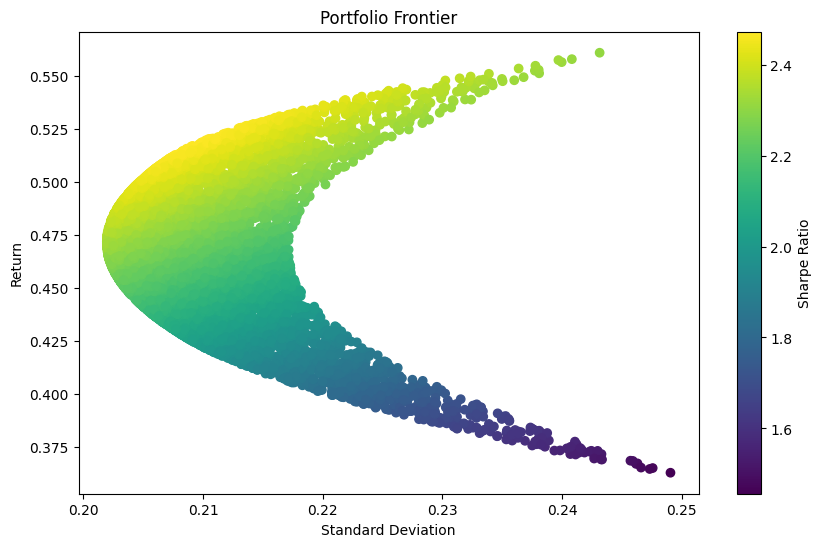

                                                Weights    Return   Std Dev
0     [0.08475376135655535, 0.7281591660098817, 0.18...  0.528592  0.220566
1     [0.5596844239388368, 0.4095280373984812, 0.030...  0.446106  0.217090
2     [0.10299215563639831, 0.15862132602268278, 0.7...  0.479153  0.203182
3     [0.3270671270727464, 0.33272826967269914, 0.34...  0.467173  0.204721
4     [0.05968832707519672, 0.4346583415004874, 0.50...  0.507180  0.206662
...                                                 ...       ...       ...
9995  [0.8256490849246563, 0.039772853004631695, 0.1...  0.384029  0.232867
9996  [0.21735353205019792, 0.2828485422819107, 0.49...  0.475975  0.202381
9997  [0.01611606307785399, 0.12039692966997778, 0.8...  0.486228  0.206042
9998  [0.42102301697496824, 0.09928073638940876, 0.4...  0.436706  0.206301
9999  [0.2612103627792587, 0.44221979038293385, 0.29...  0.484033  0.206472

[10000 rows x 3 columns]


In [47]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbols and selected stocks
symbols = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
selected_stocks = ['AAPL', 'MSFT', 'GOOGL']  # Update this list with your selected stocks

# Download data for the selected stocks
data = yf.download(selected_stocks, start='2021-01-01', end='2021-12-31')['Adj Close']
returns = data.pct_change().dropna()

# Generate portfolios and calculate returns and standard deviations
portfolio_results = []
num_portfolios = 10000
for _ in range(num_portfolios):
    weights = np.random.random(len(selected_stocks))
    weights /= np.sum(weights)

    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    portfolio_results.append({
        'Weights': weights,
        'Return': portfolio_return,
        'Std Dev': portfolio_std_dev
    })

# Create a DataFrame from portfolio results
portfolio_df = pd.DataFrame(portfolio_results)

# Plot the portfolio frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Std Dev'], portfolio_df['Return'], c=portfolio_df['Return'] / portfolio_df['Std Dev'], marker='o')
plt.title('Portfolio Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Display the portfolio results table
print(portfolio_df)


Strateji 10

DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000
DOW: Data doesn't exist for startDate = 1420088400, endDate = 1451538000
DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400
DOW: Data doesn't exist for startDate = 1451624400, endDate = 1483160400
DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
DOW: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400
DOW: Data doesn't exist for startDate = 1514782800, endDate = 1546232400


   Year  Initial Investment  Avg Annual Return (%)  Std Dev (%)  \
0  2015                1000               7.500699    18.353970   
1  2016                1000              14.132526    14.615349   
2  2017                1000              28.034141    22.737508   
3  2018                1000               1.171572    15.033849   
4  2019                1000              27.316914    17.240218   
5  2020                1000               9.492779    22.895676   
6  2021                1000              22.816694    21.092864   

   Avg Max Drawdown (%)  Sharpe Ratio  \
0            -18.844157      6.487420   
1            -15.062230     15.350088   
2            -10.627973     19.572426   
3            -22.444751      1.237083   
4            -15.448775     25.152964   
5            -37.381384      6.581731   
6            -16.404824     17.171864   

                                     Selected Stocks  
0  GOOGL, WMT, CAT, UNH, INTC, WBA, AXP, MCD, CVX...  
1  VZ, AXP, CAT, MCD, GS

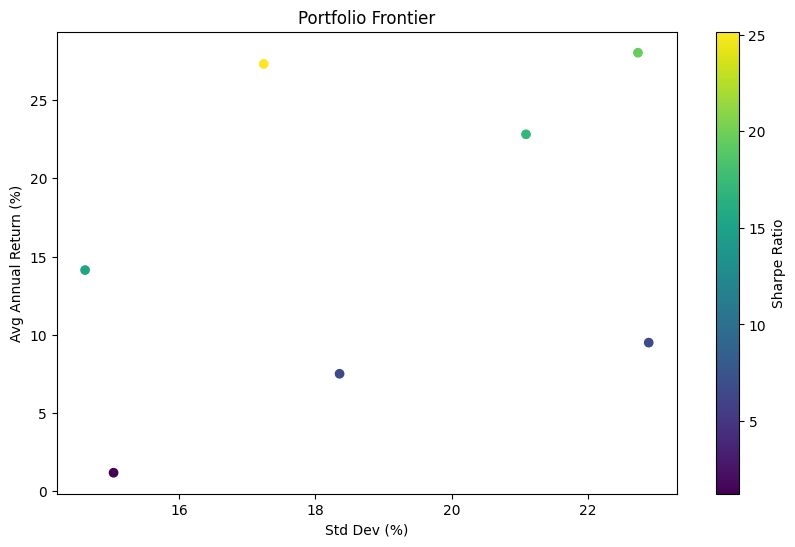

In [45]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

symbols = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'V', 'PG', 'JNJ', 'HD', 'DIS', 'UNH', 'KO', 'VZ', 'MCD', 'INTC', 'NKE', 'MRK', 'WMT', 'CRM', 'IBM', 'TRV', 'CSCO', 'AXP', 'CVX', 'BA', 'GS', 'CAT', 'DOW', 'AMGN', 'WBA', 'HON']
num_stocks = 5

risk_free_rate = 0.0
initial_investment = 1000

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
portfolio_results = []

for year in years:
    annual_returns = []
    max_drawdowns = []

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=f'{year}-01-01', end=f'{year}-12-31')

        if len(history) > 0:
            prices = history['Close']
            initial_price = prices.iloc[0]
            final_price = prices.iloc[-1]
            annual_return = ((final_price / initial_price) - 1) * 100
            annual_returns.append(annual_return)

            drawdowns = (prices / prices.cummax() - 1) * 100
            max_drawdown = drawdowns.min()
            max_drawdowns.append(max_drawdown)

    avg_annual_return = np.mean(annual_returns)
    std_dev_annual_return = np.std(annual_returns)
    avg_max_drawdown = np.mean(max_drawdowns)
    
    excess_returns = np.array(annual_returns) - risk_free_rate / 252
    sharpe_ratio = (np.mean(excess_returns) / np.std(excess_returns)) * np.sqrt(252)
    
    data = pd.DataFrame({symbol: yf.Ticker(symbol).history(start=f'{year}-01-01', end=f'{year}-12-31')['Close'] for symbol in symbols})
    correlations = data.pct_change().corr()
    
    lowest_correlations = correlations.stack().sort_values(ascending=True).drop_duplicates()
    selected_stocks = []
    
    for pair in lowest_correlations.index:
        if pair[0] not in selected_stocks and pair[1] not in selected_stocks:
            selected_stocks.append(pair[0])
            selected_stocks.append(pair[1])
            if len(selected_stocks) == num_stocks:
                break
    
    portfolio_results.append({
        'Year': year,
        'Initial Investment': initial_investment,
        'Avg Annual Return (%)': avg_annual_return,
        'Std Dev (%)': std_dev_annual_return,
        'Avg Max Drawdown (%)': avg_max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Selected Stocks': ', '.join(selected_stocks)
    })

portfolio_results_df = pd.DataFrame(portfolio_results)

print(portfolio_results_df)

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_results_df['Std Dev (%)'], portfolio_results_df['Avg Annual Return (%)'], c=portfolio_results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Std Dev (%)')
plt.ylabel('Avg Annual Return (%)')
plt.title('Portfolio Frontier')
plt.show()
